In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
import sys
sys.path.append('..')

In [3]:
from tasks import *

input_dim=10
output_dim=10

sess = tf.InteractiveSession()

cell = NTMCell(input_dim=input_dim, output_dim=output_dim)
ntm = NTM(cell, sess, 1, 20, forward_only=True)

ntm.load('../checkpoint')

 [*] Building a NTM model
Percent: [####################] 100% Finished.
 [*] Build a NTM model finished
 [*] Reading checkpoints...


In [4]:
ntm.load('../checkpoint')

 [*] Reading checkpoints...


In [5]:
copy(ntm, 5, sess)

 true output : 
[array([ 0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32),
 array([ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.], dtype=float32),
 array([ 0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.], dtype=float32),
 array([ 0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.], dtype=float32),
 array([ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.], dtype=float32)]
 predicted output :
array([[ 0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.]], dtype=float32)
 Loss : 0.059722


In [6]:
seq, outputs, loss = copy(ntm, 10, sess, print_=False)

In [7]:
np.zeros_like(seq[0])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [8]:
np.zeros_like(outputs)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [9]:
def plot(ntm, seq_length, sess):
    seq, outputs, loss = copy(ntm, seq_length, sess, print_=False)
    
    shape = list(np.array(outputs).shape)
    shape[0] += 2
    z1 = np.zeros_like(outputs)
    z2 = np.zeros(shape)
    
    s1 = np.zeros_like(seq[0]); s1[0]=1
    s2 = np.zeros_like(seq[0]); s2[1]=1
    
    seq = [s1] + seq + [s2]
    
    seq = np.r_[np.array(seq), z1]
    outputs = np.r_[z2, outputs]
    
    plt.figure(1,figsize=(20,7))
    plt.subplot(211)
    plt.imshow(seq.T, interpolation='nearest')
    plt.subplot(212)
    plt.imshow(outputs.T, interpolation='nearest')
    print("Loss : %f" % loss)

Loss : 0.009557


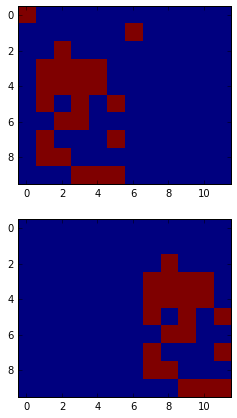

In [10]:
plot(ntm, 5, sess)

Loss : 8.551341


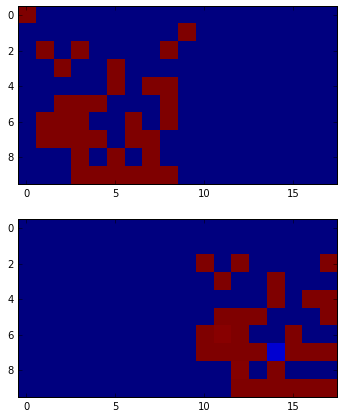

In [13]:
plot(ntm, 8, sess)

Loss : 25.066570


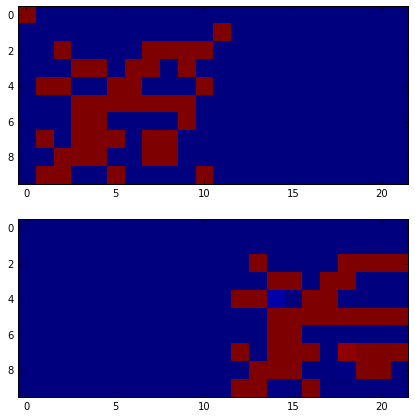

In [14]:
plot(ntm, 10, sess)

Loss : 141.280701


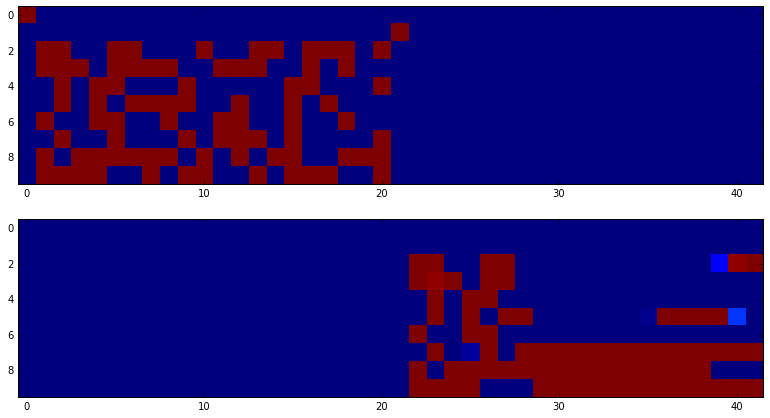

In [12]:
plot(ntm, 20, sess)